In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data =pd.read_csv("iris-head-num.txt")

## the first 5
data.head()

data.tail() #printing the last 5

,sepallength,sepalwidth,petallength,petalwidth,species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [4]:
data.describe()
## or data.describe().T


,sepallength,sepalwidth,petallength,petalwidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


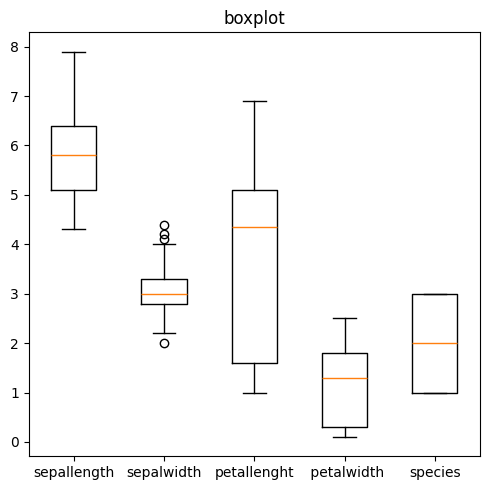

In [5]:
## boxplot for each numeric feature by species

plt.figure(figsize=(5,5))
plt.boxplot(data, tick_labels =["sepallength", "sepalwidth","petallenght"," petalwidth", "species"])
plt.title("boxplot")
plt.tight_layout()



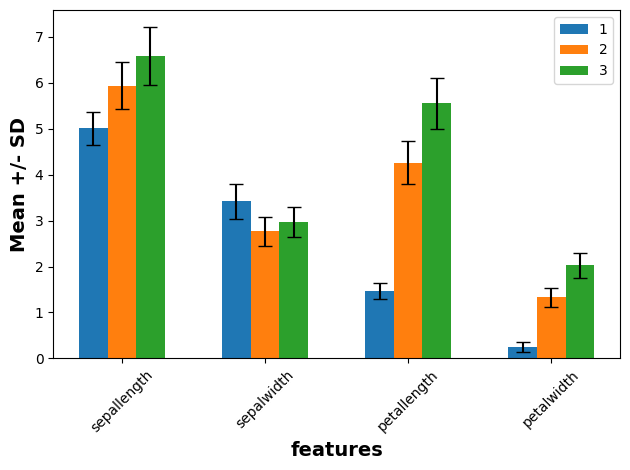

In [6]:
## group by species and calculate mean and standard deviation for each feature:
stats = data.groupby("species").agg(["mean","std"])

## define the positions for the features
features = ["sepallength", "sepalwidth", "petallength", "petalwidth"]
x = np.arange(len(features))

##create teh plot
fig, ax = plt.subplots()

# loop through each species and plot a bar chart with error bars for each feature
bar_width = 0.2 # width of the bars
for i, species_name in enumerate(data["species"].unique()):
    ##get the mean and standard deviation for each feature for the current species
    species_mean = stats.loc[species_name,(features, "mean")]
    species_std = stats.loc[species_name,(features, "std")]

    # Shift the bars for each species so that they do not overlap
    ax.bar(x+i*bar_width, species_mean, yerr=species_std, width=bar_width, capsize=5, label=species_name, align="center")

#Aesthetics

ax.legend(loc="upper right")
ax.set_xlabel("features", fontsize=14, fontweight = "bold")
ax.set_ylabel("Mean +/- SD", fontsize = 14, fontweight ="bold")
ax.set_xticks(x+bar_width) # adjust the x-ticks to be centered with the bars
ax.set_xticklabels(features, rotation=45)
plt.tight_layout()

In [7]:
### P A N D A

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
## generating dataframe

df=pd.DataFrame({"a":[1,2,3],
                 "b":[4,5,6],
                 "c":[7,8,9]},
                 index= [1,2,3])
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [9]:
df1=pd.DataFrame([[1,2,3],
                 [4,5,6],
                 [7,8,9]],
                 index= [1,2,3],
                 columns = ["a","b","c"])
df1

,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


In [10]:
## multi index data frame

dfMultiIndex=pd.DataFrame({"a":[1,2,3],
                 "b":[4,5,6],
                 "c":[7,8,9]},
                 index= pd.MultiIndex.from_tuples ([("d",1),("d",2),("e", 2)],
                                       names=["x1","x2"]))
dfMultiIndex

a  b  c
x1 x2         
d  1   1  4  7
   2   2  5  8
e  2   3  6  9

In [ ]:
df

In [45]:
# .loc uses labels, and .iloc uses indices
print(df.loc[2,"5"])

8


In [47]:
## iloc
print(df.iloc[2,2])

9


In [53]:
##multiple numbers
df.loc[2,["a","b","c"]]


a    2
b    5
c    8
Name: 2, dtype: int64

In [52]:
df.iloc[2,1:3]

b    6
c    9
Name: 3, dtype: int64

In [54]:
# multiIndex
dfMultiIndex.loc[("d",2), ("b","c")]

b    5
c    8
Name: (d, 2), dtype: int64

In [55]:
dfMultiIndex.iloc[1,1:3]

b    5
c    8
Name: (d, 2), dtype: int64

In [56]:
df_new = pd.concat([df,df], axis = 1)
df_new

,a,b,c,a,b,c
1,1,4,7,1,4,7
2,2,5,8,2,5,8
3,3,6,9,3,6,9


In [57]:
df_new

,a,b,c,a,b,c
1,1,4,7,1,4,7
2,2,5,8,2,5,8
3,3,6,9,3,6,9


In [58]:
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [59]:
## sort values
df.sort_values("a", ascending=False)

,a,b,c
3,3,6,9
2,2,5,8
1,1,4,7


In [60]:
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [61]:
df.sort_values(1,axis=1,ascending = False)

,c,b,a
1,7,4,1
2,8,5,2
3,9,6,3


In [62]:
df.drop(columns="c", inplace=True) # inplace=True makes the drop permanent

In [63]:
df

,a,b
1,1,4
2,2,5
3,3,6


In [64]:
df.drop([2,3],inplace = True)

In [65]:
df

,a,b
1,1,4


In [12]:
## generating a Data Frame
df4 = pd.DataFrame({"col1":[11,11,12,12],
                    "col2":["a","a","b","b"]})
df4

,col1,col2
0,11,a
1,11,a
2,12,b
3,12,b


In [13]:
## other functions:
df4_new_index = df4.drop_duplicates()
print(df4_new_index)

   col1 col2
0    11    a
2    12    b


In [14]:
df4_new_with_index = df4_new_index.reset_index(drop=True)


In [76]:
df4_new_with_index

,col1,col2
0,11,a
1,12,b


In [77]:
## the first 5
df4.head()

,col1,col2
0,11,a
1,11,a
2,12,b
3,12,b


In [78]:
## the tail (the last 5??)
df4.tail()

,col1,col2
0,11,a
1,11,a
2,12,b
3,12,b


In [79]:
df

,a,b
1,1,4


In [80]:
# transpose (rows to colums ~= pivot table)
df.T

,1
a,1
b,4


In [81]:
##DESCRIBE FUnction
df.describe()

,a,b
count,1.0,1.0
mean,1.0,4.0
std,NaN,NaN
min,1.0,4.0
25%,1.0,4.0
50%,1.0,4.0
75%,1.0,4.0
max,1.0,4.0


In [82]:
# read the dataset
tip_data = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
## OR... tip_data = pd.read_csv ("tips.csv")
tip_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [83]:
#first five row
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [84]:
#last five row
tip_data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [114]:
### information about dataset
tip_data.info()

## panda always refer to string data type as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [86]:
### checking for missing values
## 0,nan --- not a number
# panda always sees 0 as a number / where missing a number panda will generate "nan" = not a number
tip_data.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [117]:
## basic statistics:
tip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [88]:
tip_data.groupby(["day"]).count()

## ignores missing values


,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [89]:
## calculate the total tip got on each bill by the waiter on different days
tip_data.groupby(["day"]).sum(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [94]:
tip_day_percentage = 100*tip_data.groupby(["day"]).sum(numeric_only=True)["tip"]/tip_data.groupby(["day"]).sum(numeric_only=True)["total_bill"]
tip_day_percentage = tip_day_percentage.to_frame("tip(%)").reset_index()

In [95]:
tip_day_percentage

,day,tip(%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


<Axes: xlabel='day'>

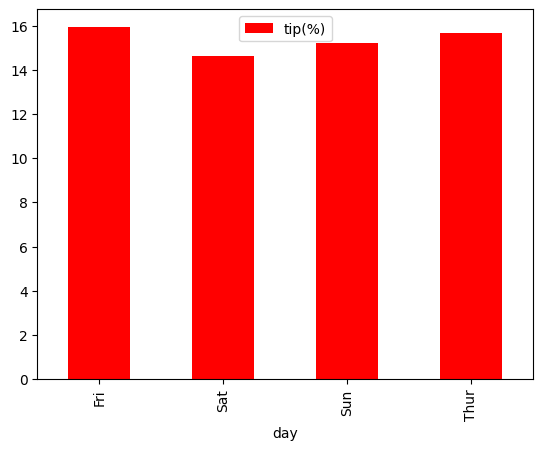

In [96]:
fig,ax=plt.subplots()
tip_day_percentage.plot(kind="bar", x="day", y="tip(%)", color="red", ax=ax)

#TASK - to play and adapt the chart!

In [100]:
days = pd.DataFrame(tip_data["day"].value_counts())
days = days.reset_index()
days.info()
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     4 non-null      object
 1   count   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


<Figure size 640x480 with 0 Axes>

array([<Axes: title={'center': 'total_bill'}>], dtype=object)

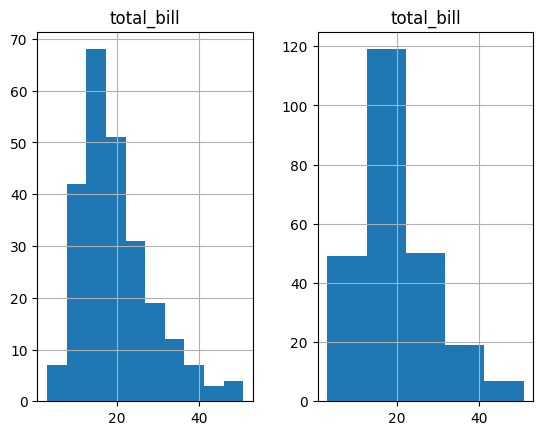

In [107]:
fig, ax=plt.subplots(1,2)
tip_data.hist(column="total_bill", ax=ax[0])
tip_data.hist(column = "total_bill",bins=5,ax=ax[1])

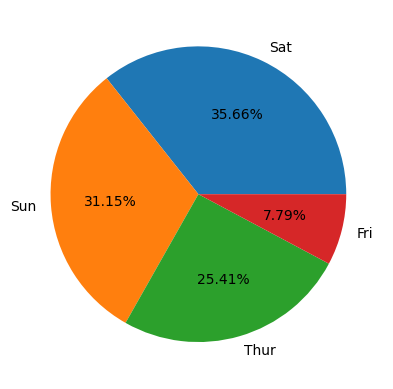

In [109]:
## convert the "day" colume to string
tip_data["day"] = tip_data["day"].astype(str)

## count the occurences of each day

day_count = pd.DataFrame(tip_data["day"].value_counts())

##reset the index

day_count = day_count.reset_index()

# Plot the pie chart

fig, ax = plt.subplots()
ax.pie(day_count["count"], labels=day_count["day"], autopct = "%1.2f%%")

##display the chart
plt.show()

In [110]:
##create the pivot table using "sum" as a string for aggfunc
pivot_table=pd.pivot_table(tip_data, values ="total_bill", index=["sex","smoker"], aggfunc="sum")

##convert toDataFrame
table=pd.DataFrame(pivot_table)

## display the result
table

total_bill
sex    smoker            
Female No          977.68
       Yes         593.27
Male   No         1919.75
       Yes        1337.07

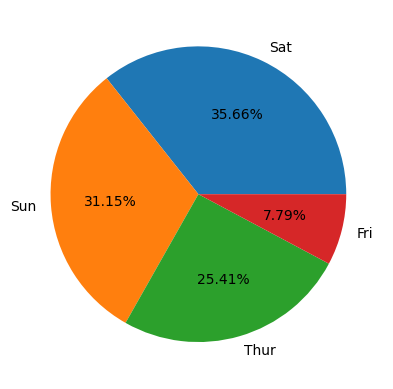

In [113]:
## convert the "day" column to string
tip_data["day"] = tip_data["day"].astype(str)

# count the occurences of each day

day_count = pd.DataFrame(tip_data["day"].value_counts())

##reset the index

day_count = day_count.reset_index()

## PLot the Pie chart

fig, ax = plt.subplots()
ax.pie(day_count["count"], labels=day_count["day"], autopct = "%1.2f%%")

plt.show()